In [104]:
# Importing the Libraries
import pandas as pd
import numpy as np 
import math
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.seasonal import seasonal_decompose



In [105]:
# Load data from a CSV file
data = pd.read_csv("./Nat_Gas.csv", index_col="Dates", parse_dates=True)
data.head()

/tmp/ipykernel_1302/2183985403.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("./Nat_Gas.csv", index_col="Dates", parse_dates=True)


,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


In [106]:
# Check for missing values
print(data.isnull().sum())

Prices    0
dtype: int64


No Missing Value in the Data

In [107]:
type(data.index[0])

pandas._libs.tslibs.timestamps.Timestamp

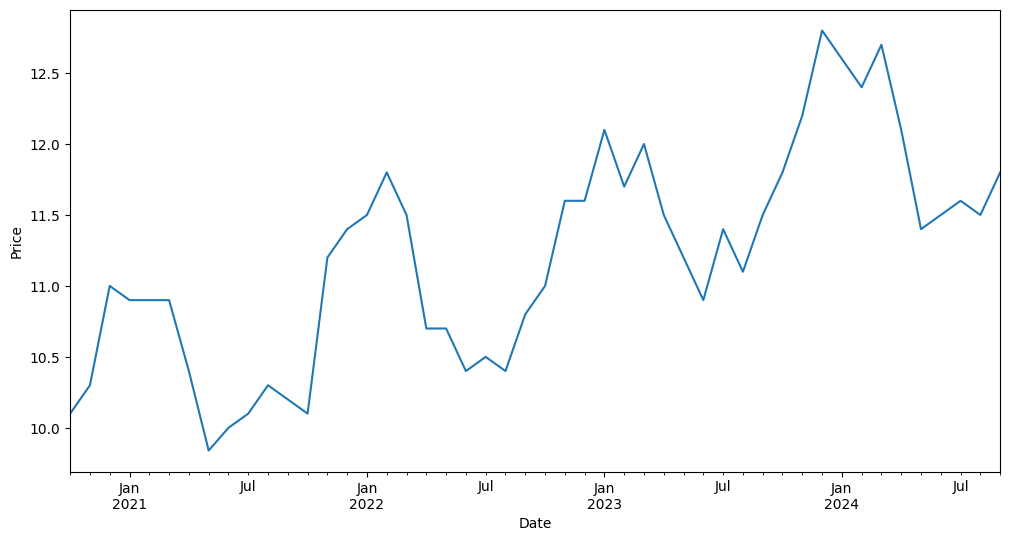

In [108]:
# Plot the time series data
data["Prices"].plot(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [109]:
def test_stationary(data: list, test_type='adfuller', p=0.05):
    if test_type == 'visual':
        # print(data.rolling(5).mean())
        rolmean = data.rolling(5).mean()
        rolstd = data.rolling(5).std()
        plt.figure(figsize=(8,4))
        plt.plot(rolmean, color='black', label='Rolling Mean')
        plt.show()
        plt.plot(rolstd, color='blue', label='Rolling std')
        plt.show()
        
    if test_type =='adfuller':
        result = ts.adfuller(data)  
        # print('Test Statistic: %f' % result[0])
        # print('p-value: %f' % result[1])
        # print('Critical Values:' ,result[4])
        if result[1] < p:
            return {'stationary': True, 'p_value': result[1]} 
        return {'stationary': False, 'p_value': result[1]} 


# print('Stationary: ', test_stationary(data['Prices'], test_type='visual'))
    

In [110]:
# Calculate Rolling Statistics of the Data
def calculate_rolling_stat(data, col:str, plot=True):
    price_means = []
    price_stds = []
    winsize = 4 

    for i in range(data.shape[0]):
        data_window = data[i:i+winsize]
        price_means.append(data_window['Prices'].mean())
        price_stds.append(data_window['Prices'].std())
        # print()
        
    if plot:
        plt.plot(data[col].to_list(), label='price')
        plt.plot(price_means, label='mean')
        # plt.show()
        plt.plot(price_stds, label='std')
        plt.show()
    return price_means, price_stds

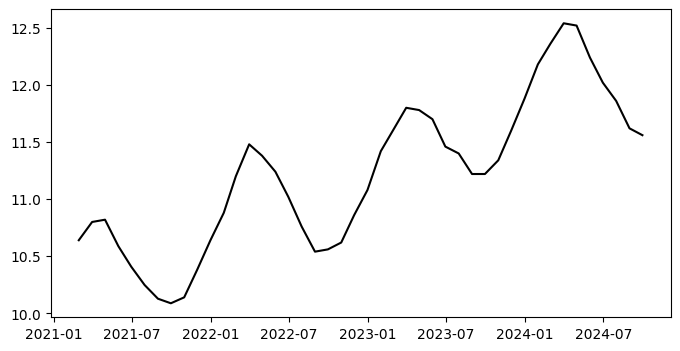

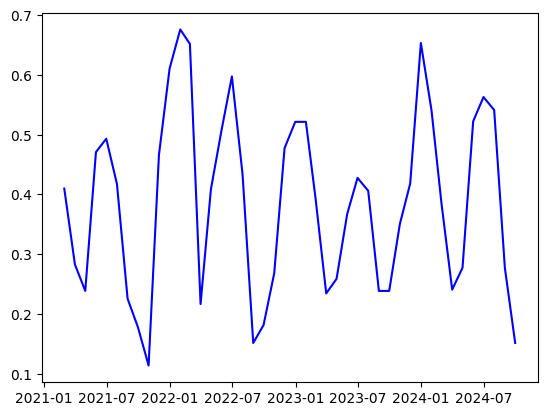

Stationary:  None
Stationary:  {'stationary': False, 'p_value': 0.973257438844869}


In [111]:
# result = ts.adfuller(data['Prices'])  
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
print('Stationary: ', test_stationary(data['Prices'], test_type='visual'))
print('Stationary: ', test_stationary(data['Prices']))

Hence Non-Stationary Data

### visualizations

(-0.5, 0.5)

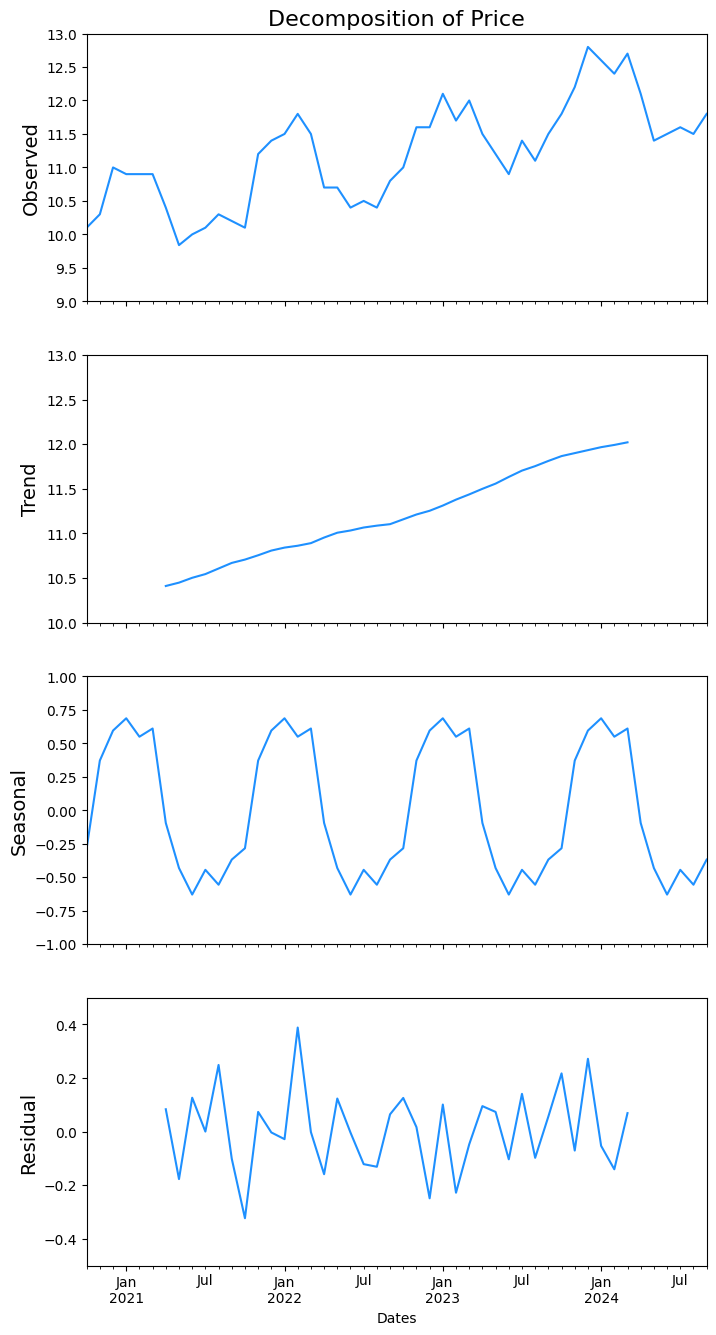

In [112]:
# Visualize Patterns
decompose_cols =  ['Prices']
decomposed_df = pd.DataFrame()

for col in decompose_cols:
    decomp = seasonal_decompose(data[col], model='additive')
    decomposed_df[f"{col}_trend"] = decomp.trend
    decomposed_df[f"{col}_seasonal"] = decomp.seasonal
    

# decomposed_df['Prices_seasonal'].plot()
    
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(8,16))
res = seasonal_decompose(data.Prices, model='additive')

ax[0].set_title('Decomposition of Price', fontsize=16)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=14)
ax[0].set_ylim([9, 13])

res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=14)
ax[1].set_ylim([10, 13])

res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=14)
ax[2].set_ylim([-1, 1])

res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=14)
ax[3].set_ylim([-0.5, 0.5])

### Solve the Trend problem (Constant Mean)

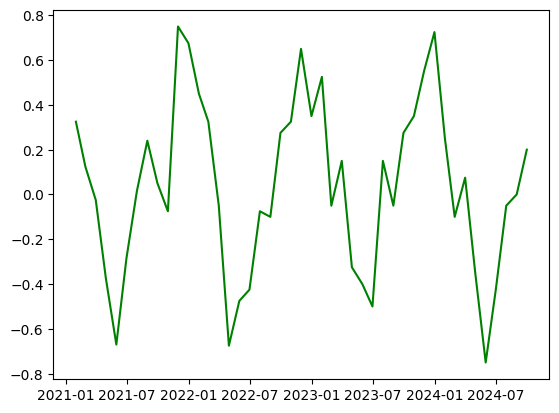

In [113]:
# Using Moving Average
data_mov_avg = data['Prices'].rolling(4).mean()
data_mov_avg_diff = data['Prices']-data_mov_avg
data_mov_avg_diff.dropna(inplace=True)
plt.plot(data_mov_avg_diff, color='g', label='Moving Average Diff')
plt.show()

In [114]:
print('New data is stationary: ',test_stationary(data_mov_avg_diff)['stationary'])

New data is stationary:  True


### Differencing Method

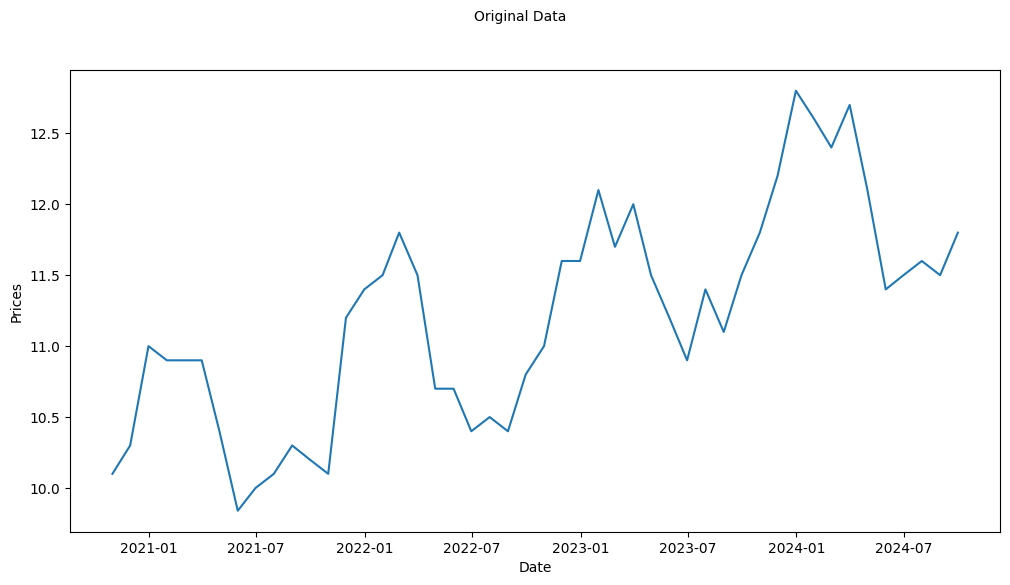

48 47


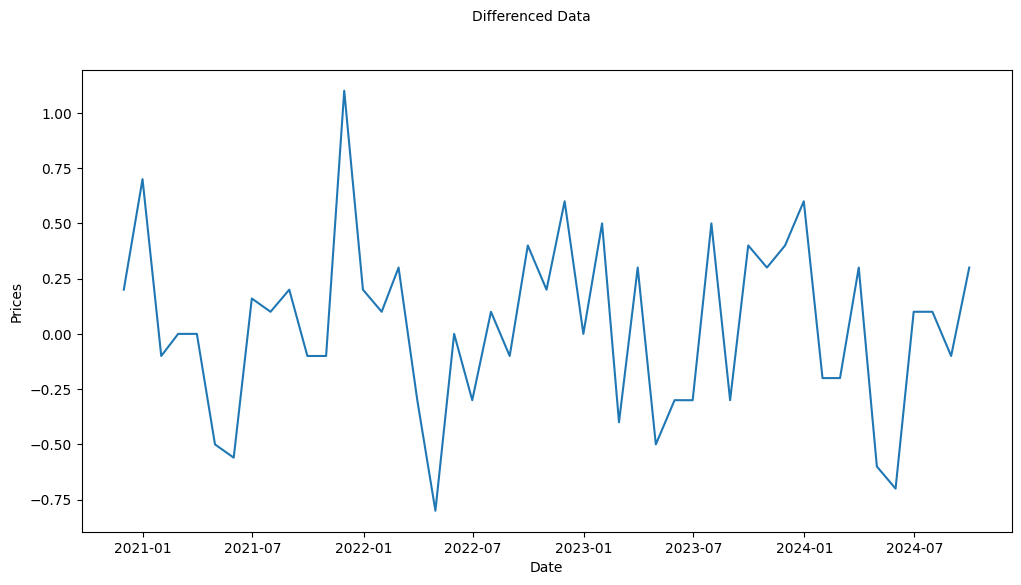

Stationary:  True


In [115]:
# Making the data stationary

differenced_data = data['Prices'].diff()
differenced_data.dropna(inplace=True)


fig = plt.figure(figsize=(12,6))
plt.plot(data['Prices'])
fig.suptitle('Original Data', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Prices', fontsize=10)
plt.show()


fig = plt.figure(figsize=(12,6))
plt.plot(differenced_data)
fig.suptitle('Differenced Data', fontsize=10)
# fig.suptitle('Original Data', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Prices', fontsize=10)
print(len(data['Prices']), len(differenced_data))
# differenced_data = differenced_data.diff()
# plt.plot(data['Prices'])
plt.show()

# plt.plot(differenced_data)
print('Stationary: ', test_stationary(differenced_data)['stationary'])


In [116]:
# data = differenced_data[differenced_data.notnull()]

In [117]:
differenced_data = pd.DataFrame(differenced_data)
# differenced_data

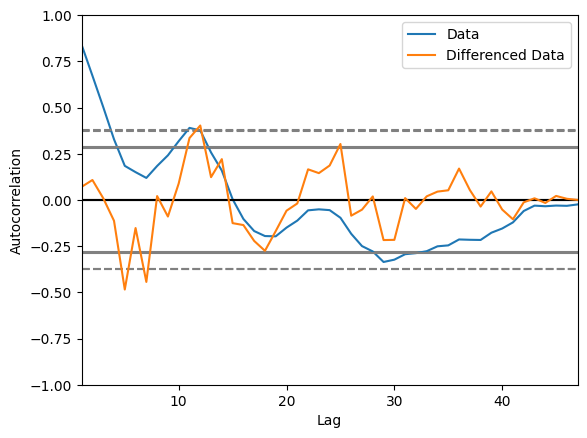

In [118]:
from pandas.plotting import autocorrelation_plot


autocorrelation_plot(data.Prices, label='Data') #np.diff(data.Prices),differenced_data.Prices
autocorrelation_plot(np.diff(data.Prices), label='Differenced Data')
plt.show()

from statsmodels.graphics.tsaplots import plot_pacf

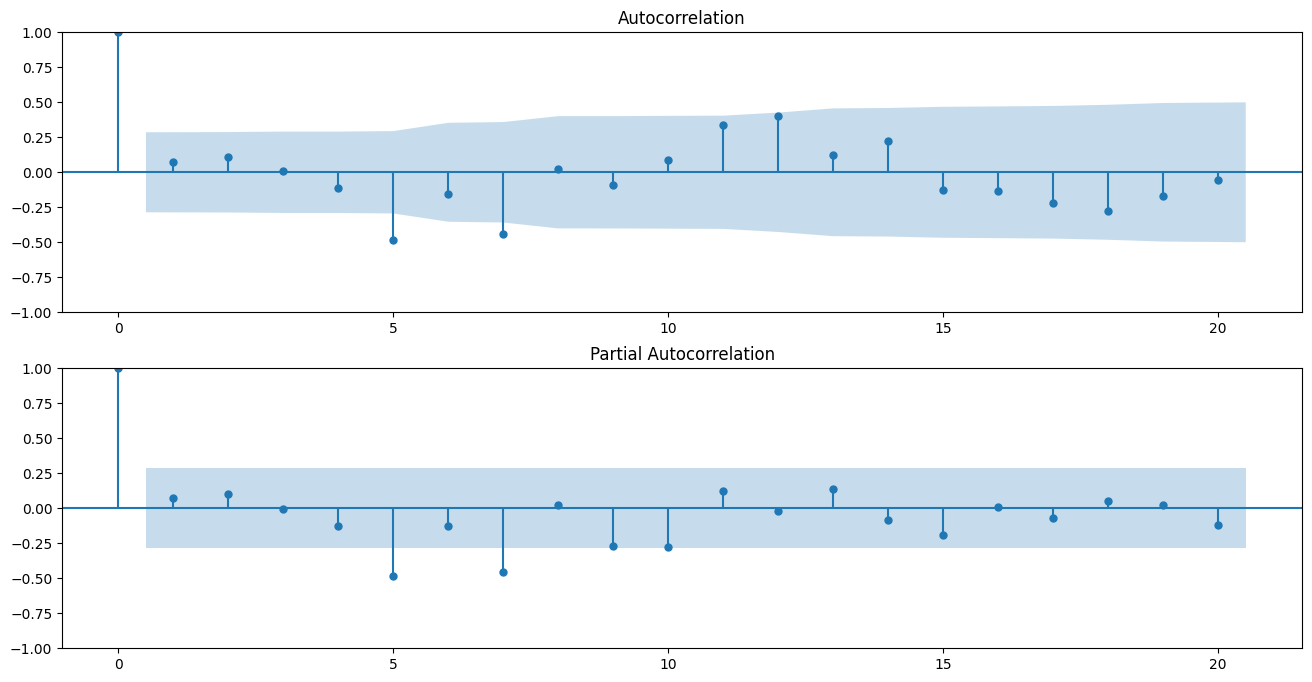

In [119]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(np.diff(data.Prices),lags=20, ax=ax[0])
plot_pacf(np.diff(data.Prices),lags=20, ax=ax[1])
plt.show()

Nothing Significant 

In [120]:
from sklearn.model_selection import TimeSeriesSplit

# N_SPLITS = 3


X_train, X_test = data.index[:int(len(data) * 0.8)], data.index[int(len(data) * 0.8):] 
y_train, y_test = data.Prices[:int(len(data) * 0.8)], data.Prices[int(len(data) * 0.8):]

# folds = TimeSeriesSplit(n_splits=N_SPLITS)


In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [122]:
def plot_approach_evaluation(y_pred, score_mae, score_rsme, approach_name):
    # f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    # f.suptitle(approach_name, fontsize=16)
    sns.lineplot(x=X_train, y=y_train, ax=ax[0], color='dodgerblue', label='Training', linewidth=2)
    sns.lineplot(x=X_test, y=y_test, ax=ax[0], color='gold', label='Ground Truth', linewidth=2) #navajowhite
    sns.lineplot(x=X_test, y=y_pred, ax=ax[0], color='darkorange', label='Predicted', linewidth=2)
    ax[0].set_xlim([data.index[0], data.index[-1]])
    ax[0].set_ylim([-27, -23])
    ax[0].set_title(f'Prediction \n MAE: {mean_absolute_error(y_test, y_pred):.2f}, RSME: {math.sqrt(mean_squared_error(y_test, y_pred)):.2f}', fontsize=14)
    ax[0].set_xlabel(xlabel='Date', fontsize=14)
    ax[0].set_ylabel(ylabel='Depth to Groundwater P25', fontsize=14)
    plt.show()

    sns.lineplot(x=0, y=score_mae,  color='gold', label='MAE', ax=ax[1])#marker='o',
    sns.lineplot(x=0, y=score_rsme, color='indianred', label='RSME', ax=ax[1])
    ax[1].set_title('Loss', fontsize=14)
    ax[1].set_xlabel(xlabel='Fold', fontsize=14)
    ax[1].set_ylabel(ylabel='Loss', fontsize=14)
    ax[1].set_ylim([0, 4])   
    plt.show()
    

In [123]:
from statsmodels.tsa.arima.model import ARIMA


score_mae = []
score_rsme = []


model = ARIMA(y_train, order=(5,1,5))
model_fit = model.fit()

y_pred = model_fit.predict(X_test[0], X_test[-1]).reset_index(drop=True)
score_mae.append(mean_absolute_error(y_test, y_pred))
score_rsme.append(math.sqrt(mean_squared_error(y_test, y_pred)))


print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
plot_approach_evaluation(y_pred, score_mae, score_rsme, 'ARIMA')
# print(y_test, y_pred)

/home/tamal/projects/.conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/tamal/projects/.conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/tamal/projects/.conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/tamal/projects/.conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MAE:  0.2538910541967597
MSE:  0.2928692998240157


/home/tamal/projects/.conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


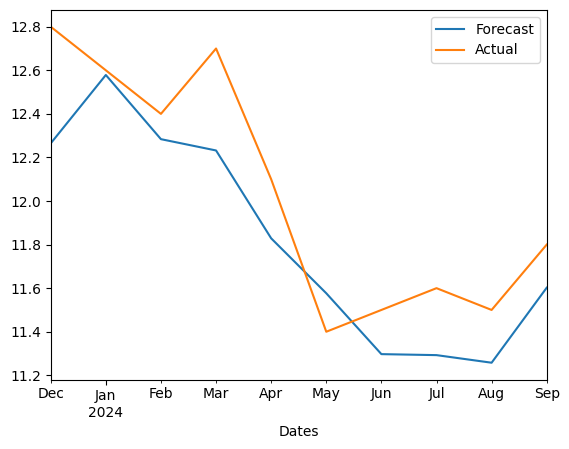

In [124]:
forecast = model_fit.forecast(steps=len(y_test))

# Evaluate the model performance (e.g., using mean squared error)
# This step is important to assess how well the model generalizes to unseen data

# Plot the forecast
forecast.plot(label="Forecast")

y_test.plot(label="Actual")
plt.legend()
plt.show()

In [125]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Prices   No. Observations:                   38
Model:                 ARIMA(5, 1, 5)   Log Likelihood                  -1.858
Date:                Thu, 18 Apr 2024   AIC                             25.717
Time:                        21:39:53   BIC                             43.437
Sample:                    10-31-2020   HQIC                            31.964
                         - 11-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4090      0.391     -1.046      0.295      -1.175       0.357
ar.L2          0.7514      0.152      4.942      0.000       0.453       1.049
ar.L3          0.4582      0.353      1.297      0.1

In [126]:
print(X_test[0])
date = '2023-12-31'
print(type(X_test[0]), type(date), type(pd.Timestamp(date)))

2023-12-31 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'str'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


/tmp/ipykernel_1302/1509412437.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted price on {date}: {pred_price[0]}")


Predicted price on 2022-05-31 00:00:00: 10.751055974193852


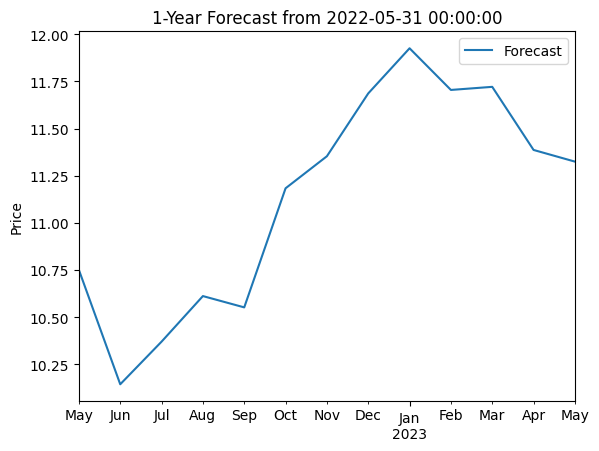

In [127]:


def predict_price(date, model_fit) -> None:  
    date = pd.Timestamp(date)
    start_date = date
    
    end_date = date + pd.DateOffset(years=1)
    # print(end_date)

    # Generate forecast for the next year
    pred_price = model_fit.predict(start=start_date, end=end_date) 
    

    print(f"Predicted price on {date}: {pred_price[0]}")

    # Plot the forecast
    pred_price.plot(label='Forecast')
    # print(pred_price.values, data.loc[start_date:end_date, 'Prices'].values)
    # if start_date < data.index[-1] and end_date > data.index[0]:
    #     data.loc[max(start_date, data.index[0]):end_date, 'Prices'].plot(label='Actual')
    plt.ylabel('Price') 
    plt.title(f'1-Year Forecast from {date}') 
    plt.legend()
    plt.show()


date = '2022-05-31' 
predict_price(date, model_fit)  
